In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from somperf.metrics import *
from somperf.utils.topology import rectangular_topology_dist

import optuna
import numpy as np

d:\Kuliah\JST\Neural-Network-Final-Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##Data Analysis

In [2]:
df = pd.read_excel('dataset.xlsx', sheet_name='Sheet1') 
data = df.iloc[:,:-1].values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656 entries, 0 to 5655
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   meanR   5656 non-null   float64
 1   meanG   5656 non-null   float64
 2   meanB   5656 non-null   float64
 3   stdR    5656 non-null   float64
 4   stdG    5656 non-null   float64
 5   stdB    5656 non-null   float64
 6   skewR   5656 non-null   float64
 7   skewG   5656 non-null   float64
 8   skewB   5656 non-null   float64
 9   kurR    5656 non-null   float64
 10  kurG    5656 non-null   float64
 11  kurB    5656 non-null   float64
 12  entR    5656 non-null   float64
 13  entG    5656 non-null   float64
 14  entB    5656 non-null   float64
 15  Class   5656 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 707.1 KB


In [4]:
df.head(5)

,meanR,meanG,meanB,stdR,stdG,stdB,skewR,skewG,skewB,kurR,kurG,kurB,entR,entG,entB,Class
0,17.395776,18.057278,4.548844,40.818315,42.747400,15.235375,2.080558,2.117612,4.194824,2.786645,2.922868,18.932746,11.312396,11.302187,10.864530,1
1,17.048930,17.143965,4.285857,41.389466,42.116279,14.243516,2.185737,2.233318,4.195780,3.243245,3.436646,19.700106,11.256998,11.242310,10.867538,1
2,19.957301,16.498584,5.082156,48.724795,40.816921,15.203335,2.169338,2.245723,3.863509,3.069086,3.474671,17.313374,11.242156,11.228013,11.041794,1
3,19.713066,18.029258,4.707696,47.484912,43.629222,14.230307,2.135099,2.147982,3.987222,2.920590,2.926331,18.956953,11.266421,11.260806,11.034323,1
4,17.383914,14.581238,4.632718,46.006665,38.900382,14.446719,2.417031,2.458251,3.903999,4.259136,4.460186,17.438845,11.103429,11.094264,10.944285,1


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meanR,5656.0,20.894382,5.260718,6.854176,17.015386,20.055104,23.933250,46.994451
meanG,5656.0,18.023509,3.885058,6.259336,15.462487,17.823574,20.508286,37.866338
meanB,5656.0,5.562521,1.572465,1.823841,4.469088,5.206807,6.298417,14.023399
stdR,5656.0,49.518673,9.091646,23.889681,42.518804,48.737837,55.533851,78.573397
stdG,5656.0,43.181128,5.799811,21.816707,39.565446,43.274979,47.258675,63.912439
stdB,5656.0,16.216090,2.737406,7.831019,14.261454,15.830328,17.684630,29.260652
skewR,5656.0,2.164332,0.298941,1.154889,1.962475,2.147151,2.337118,3.582313
skewG,5656.0,2.232326,0.340901,1.203163,2.003130,2.188874,2.405244,3.997579
skewB,5656.0,3.745612,0.647198,1.944842,3.304125,3.764237,4.170742,7.961952
kurR,5656.0,3.208423,1.533598,-0.531692,2.161075,3.023438,3.989808,12.941081


In [6]:
df.isna()

,meanR,meanG,meanB,stdR,stdG,stdB,skewR,skewG,skewB,kurR,kurG,kurB,entR,entG,entB,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5652,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5653,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5654,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
print(df['Class'].drop_duplicates())
class_labels = df['Class'].values

0       1
448     2
2185    3
2576    4
4085    5
4459    6
Name: Class, dtype: int64


###EDA

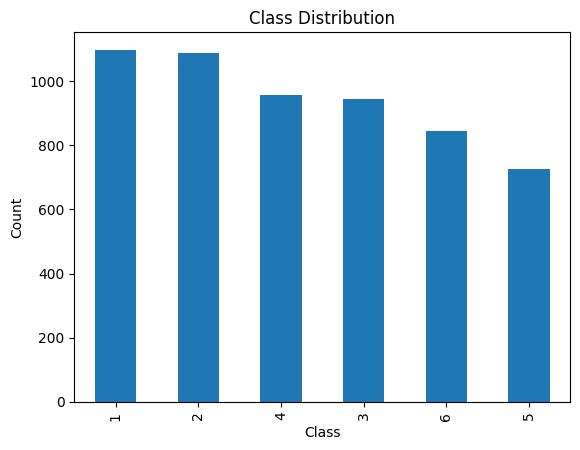

In [8]:
#CEk class imbalance
df['Class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


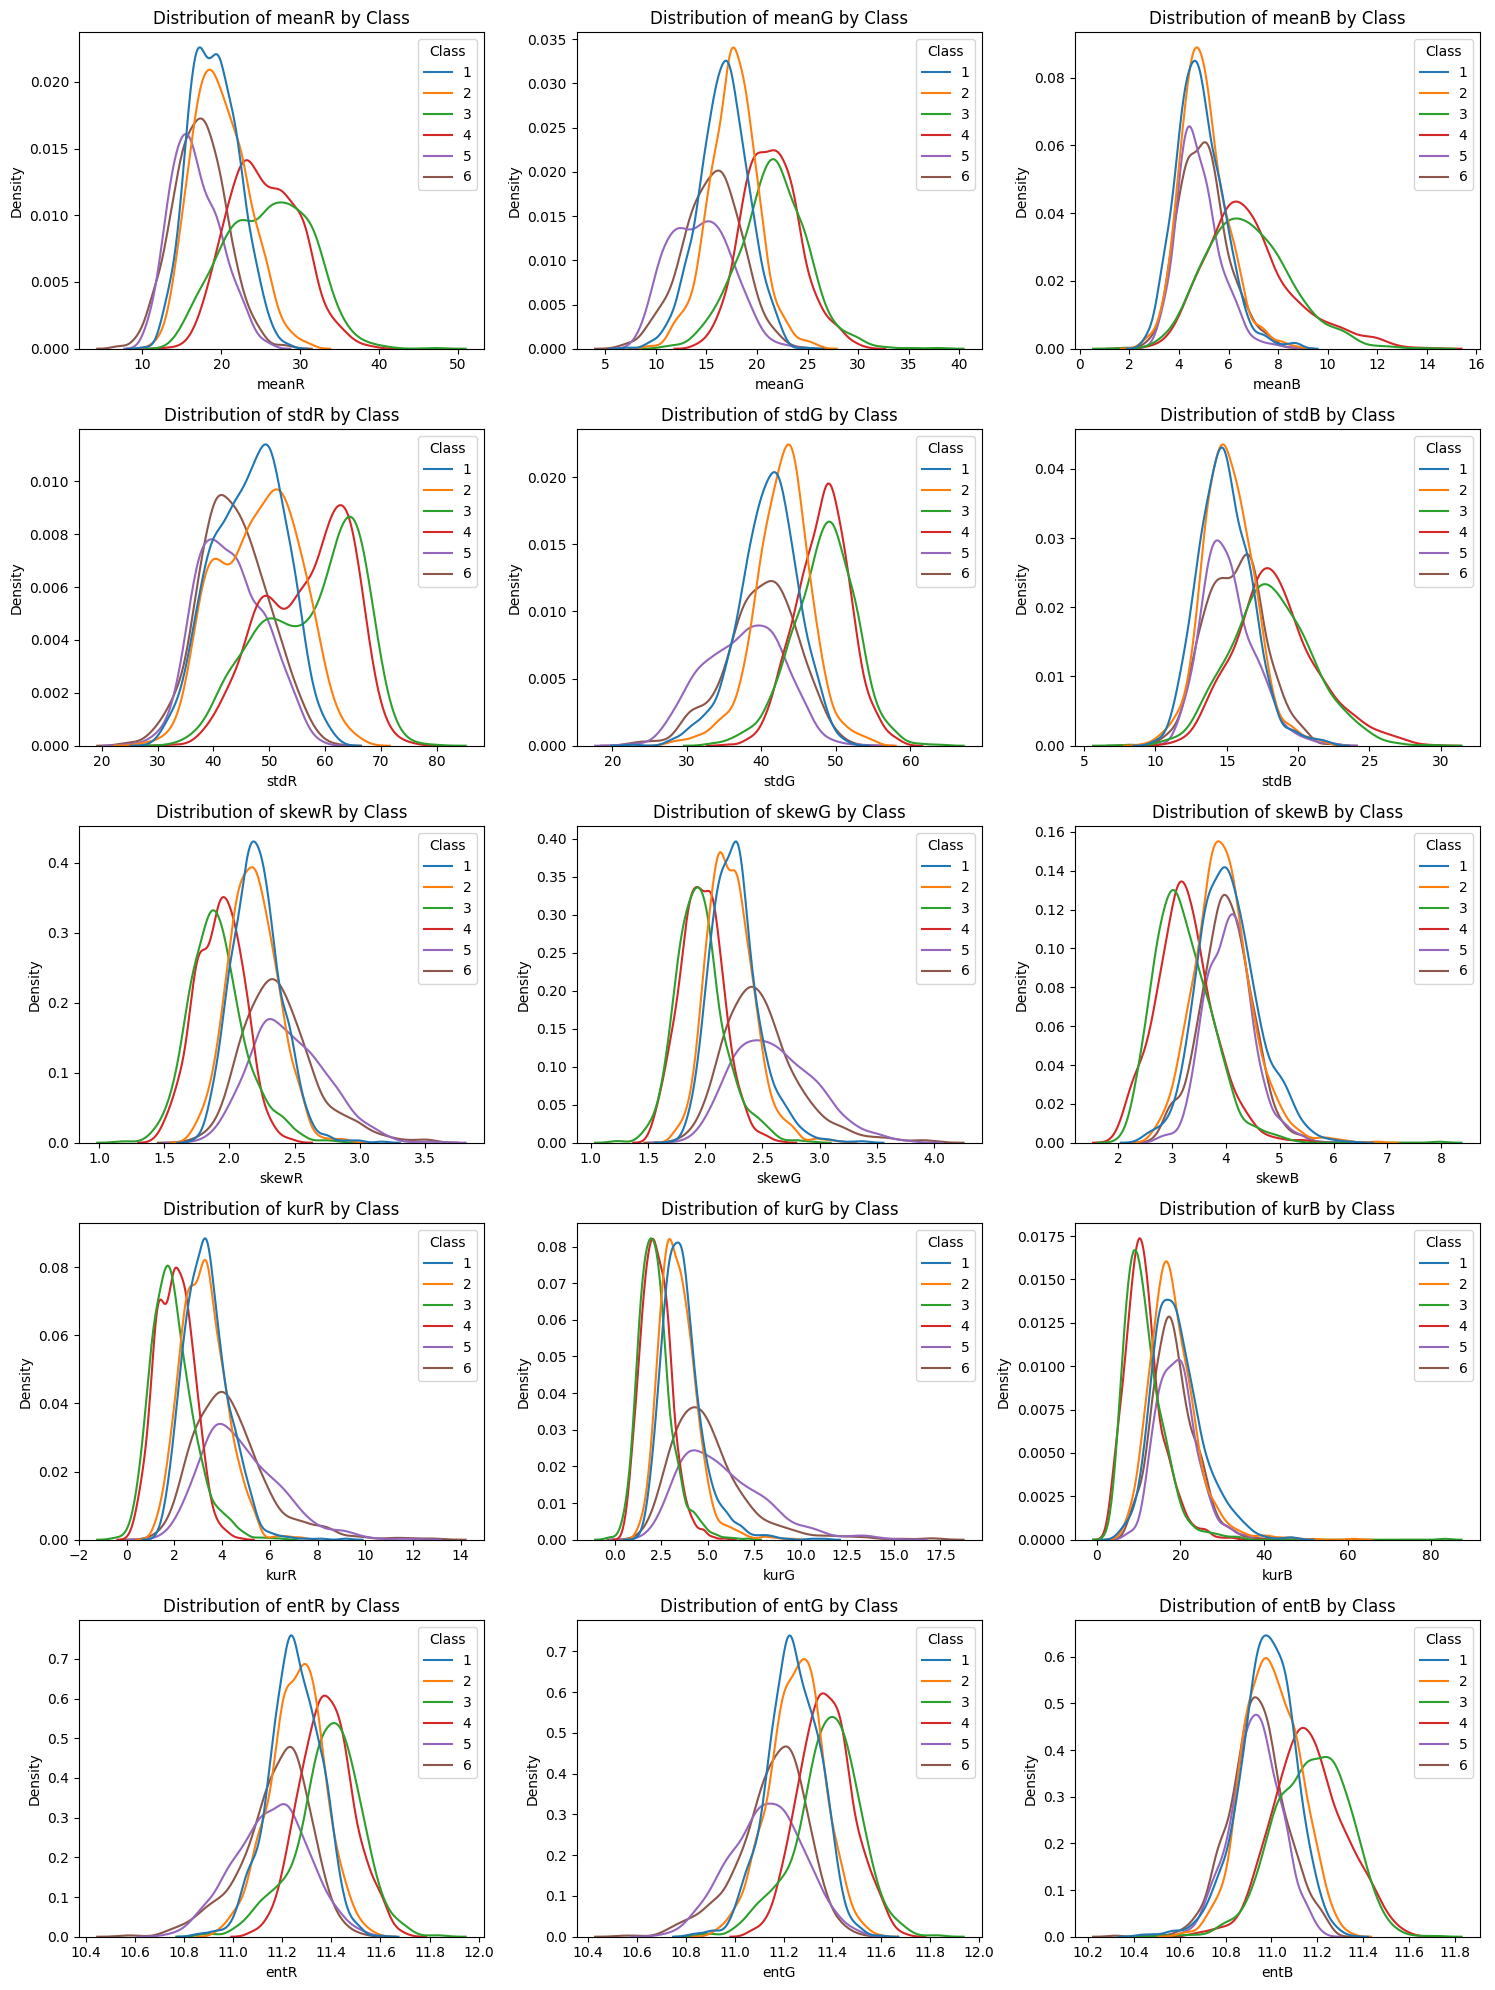

In [9]:
features = df.columns[:-1]  # All features except the class

plt.figure(figsize=(15, 20))
for i, feature in enumerate(df.columns[:-1], 1):  # All features except 'Class'
    plt.subplot(5, 3, i)
    sns.kdeplot(data=df, x=feature, hue="Class", fill=False, palette="tab10")
    plt.title(f'Distribution of {feature} by Class')
plt.tight_layout()
plt.show()

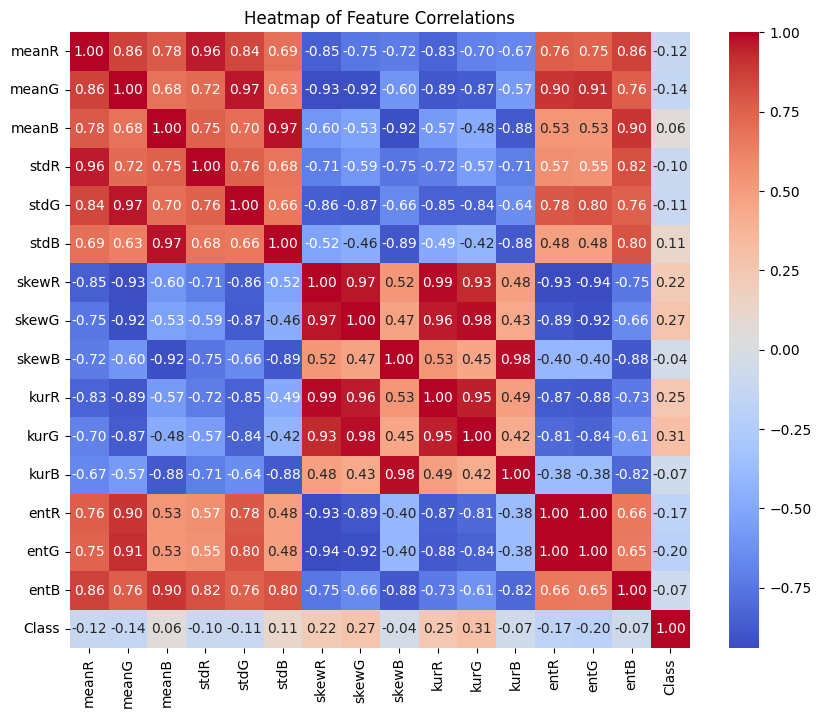

In [10]:
#Cek Heatmap Fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Feature Correlations")
plt.show()

In [11]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif

# Load dataset
df = pd.read_excel('dataset.xlsx', sheet_name='Sheet1')

# Pisahkan fitur dan label kelas
features = df.iloc[:, :-1].values
feature_names = df.columns[:-1]
class_labels = df['Class'].values

# Pendekatan 2: Principal Component Analysis (PCA)
pca = PCA(n_components=1)
principal_component = pca.fit_transform(features)

# Ambil kontribusi tiap fitur dalam komponen utama
pca_contribution = abs(pca.components_[0])

# Pendekatan 3: Feature Importance dengan Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(features, class_labels)
feature_importances = rf.feature_importances_

# Pendekatan 4: Information Gain (Mutual Information)
mutual_info = mutual_info_classif(features, class_labels)

# Gabungkan hasil ke dalam DataFrame untuk perbandingan
results = pd.DataFrame({
    'Feature': feature_names,
    'PCA Contribution': pca_contribution,
    'Random Forest Importance': feature_importances,
    'Mutual Information': mutual_info
})

# Tampilkan hasil
print(results)


   Feature  PCA Contribution  Random Forest Importance  Mutual Information
0    meanR          0.383583                  0.069365            0.316058
1    meanG          0.248781                  0.074920            0.347484
2    meanB          0.100655                  0.052813            0.221131
3     stdR          0.655776                  0.081854            0.280638
4     stdG          0.384740                  0.085989            0.328028
5     stdB          0.163276                  0.060006            0.177946
6    skewR          0.018031                  0.065140            0.344414
7    skewG          0.018584                  0.066879            0.345075
8    skewB          0.041176                  0.059155            0.223837
9     kurR          0.092309                  0.066964            0.349935
10    kurG          0.099430                  0.083406            0.360643
11    kurB          0.393822                  0.065145            0.241694
12    entR          0.007

In [12]:
#Cek outlier
def cek_outlier(data):
    fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 12))
    fig.suptitle('Boxplots of Each Feature to Detect Outliers')

    features = data.columns[:-1]  # All features excluding the 'Class' column
    for i, feature in enumerate(features):
        sns.boxplot(data=data, y=feature, ax=axes[i // 5, i % 5])
        axes[i // 5, i % 5].set_title(f'{feature}')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    

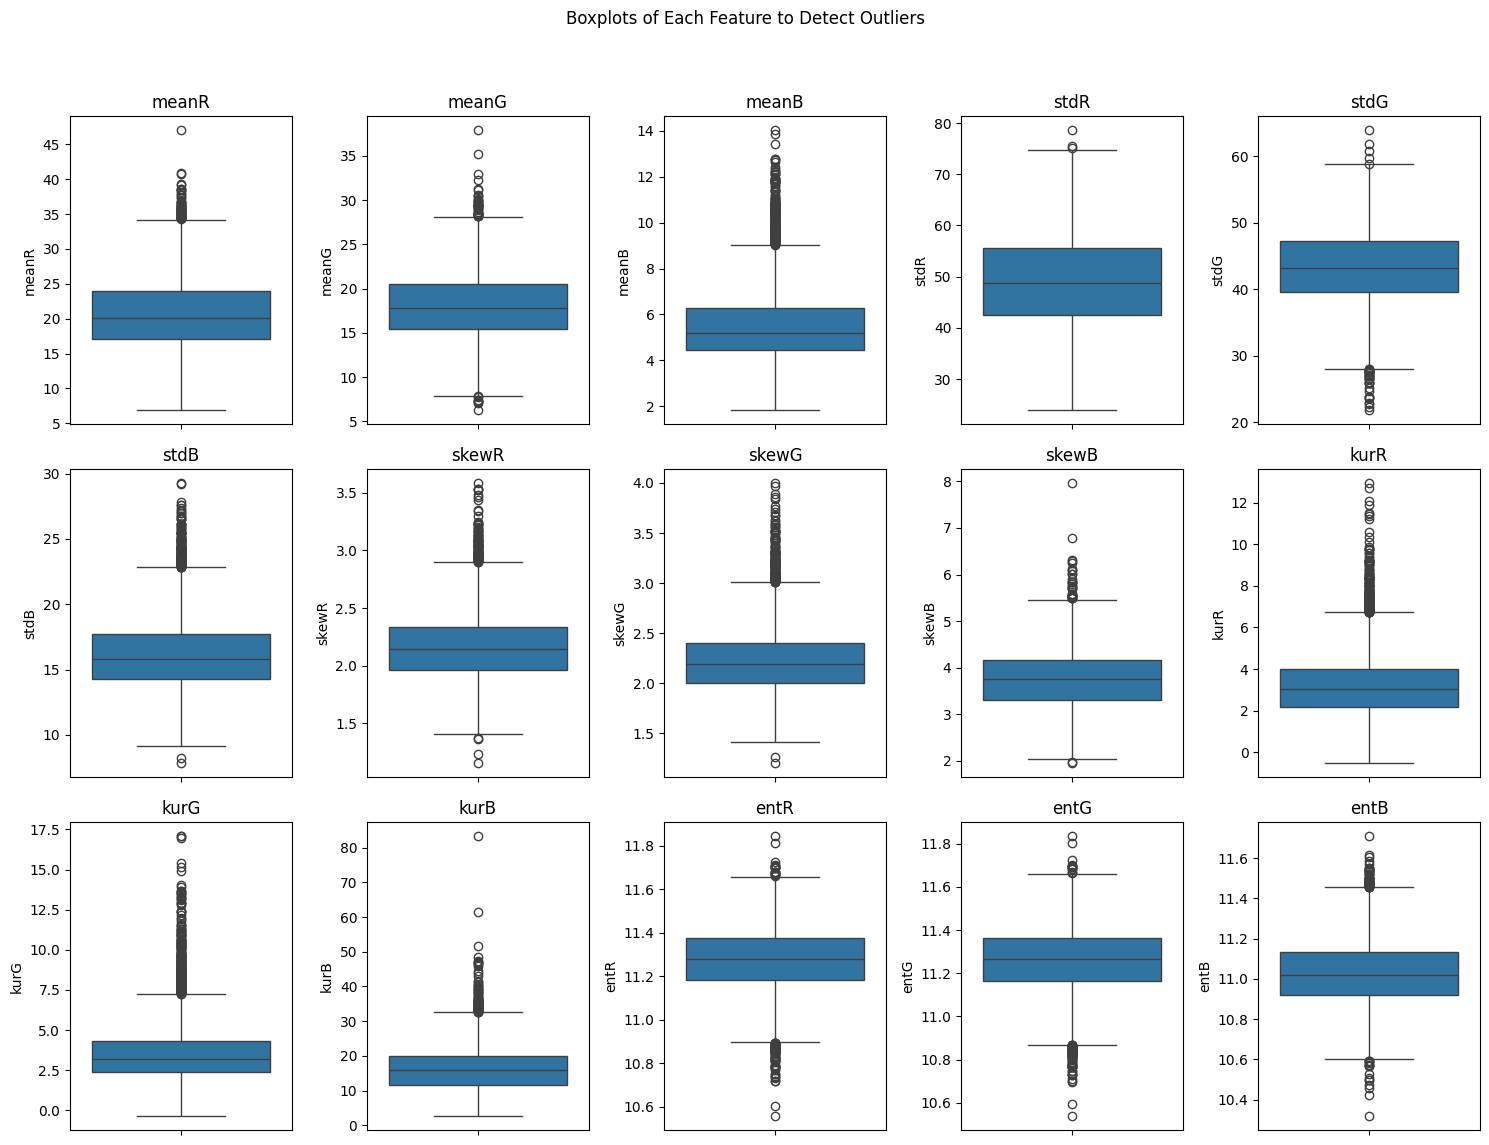

In [13]:
cek_outlier(df)

###Preprocessing

In [14]:
#Standarization
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df.copy())
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head(3)

,meanR,meanG,meanB,stdR,stdG,stdB,skewR,skewG,skewB,kurR,kurG,kurB,entR,entG,entB,Class
0,-0.665102,0.008693,-0.644699,-0.957046,-0.074790,-0.358296,-0.280260,-0.336533,0.694148,-0.275050,-0.357389,0.413462,0.260530,0.270445,-1.030791,-1.344481
1,-0.731039,-0.226412,-0.811958,-0.894219,-0.183617,-0.720664,0.071609,0.002909,0.695626,0.022708,-0.088418,0.532731,-0.107272,-0.118157,-1.012572,-1.344481
2,-0.178144,-0.392545,-0.305512,-0.087327,-0.407671,-0.370002,0.016748,0.039301,0.182180,-0.090864,-0.068511,0.161766,-0.205810,-0.210945,0.042868,-1.344481


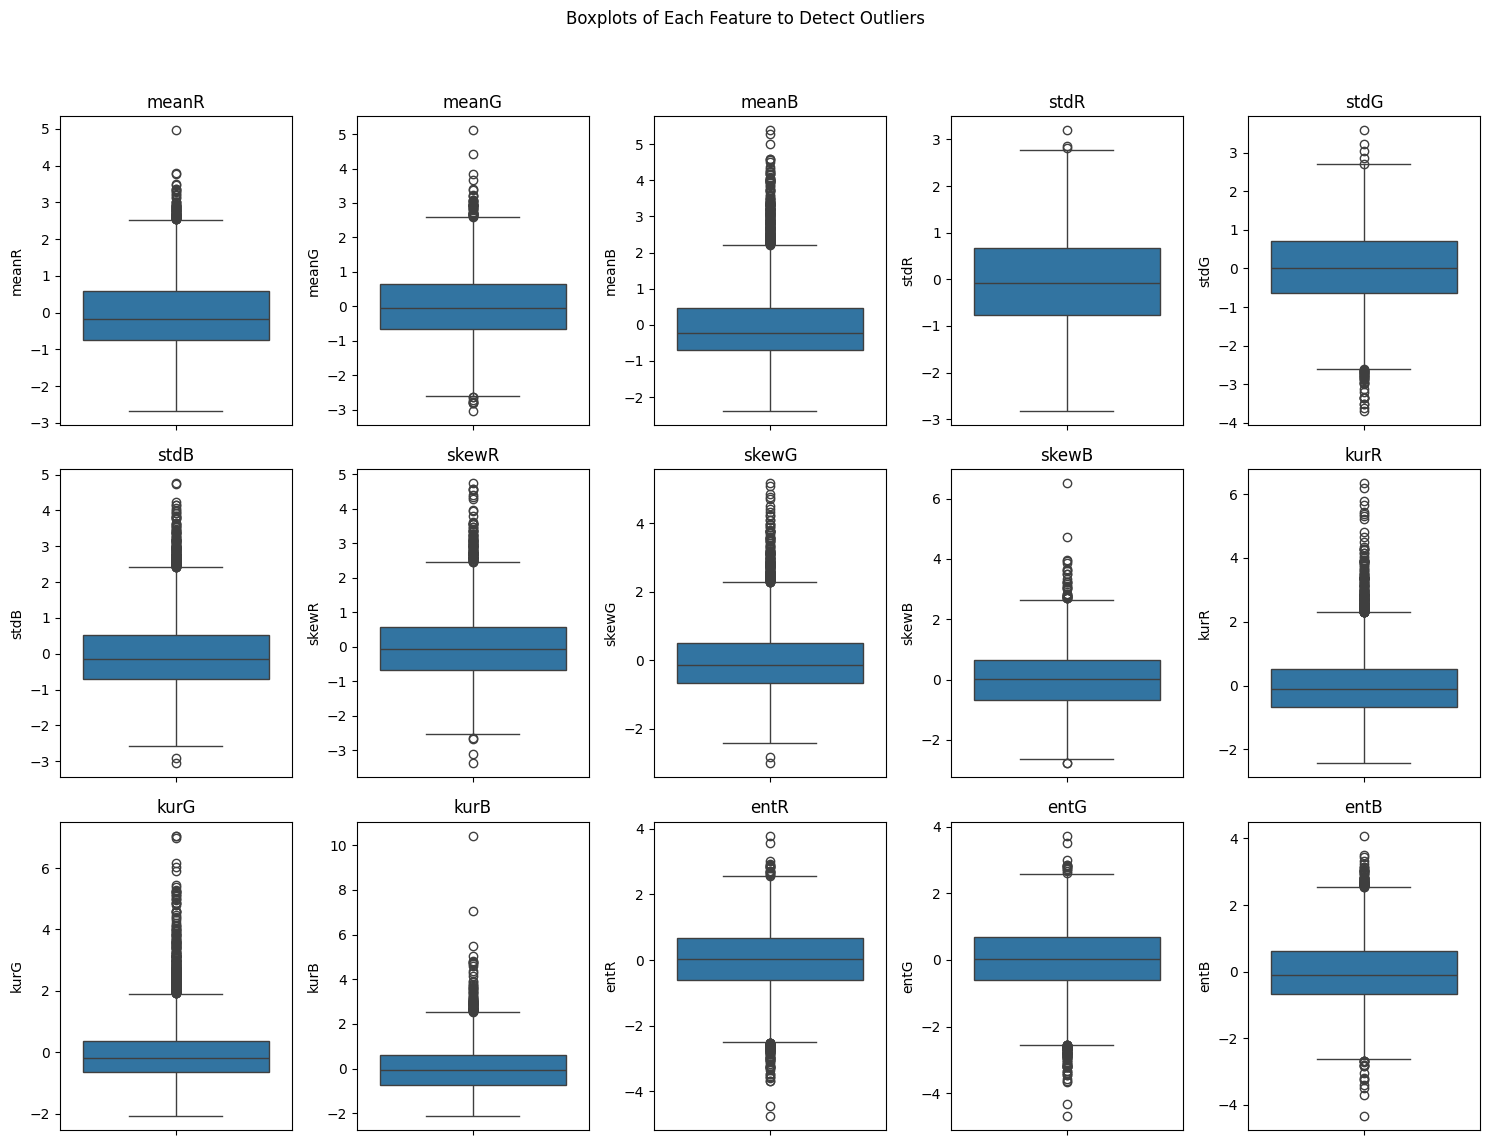

In [15]:
cek_outlier(df_scaled)

In [16]:
outlier_count = ((df_scaled > 3) | (df_scaled < -3)).sum()
total_outliers = outlier_count.sum()
proportion_outliers = total_outliers / (df_scaled.shape[0] * df_scaled.shape[1])
print(f"Jumlah Proporsi Outlier: {proportion_outliers:.2%}")


Jumlah Proporsi Outlier: 0.67%


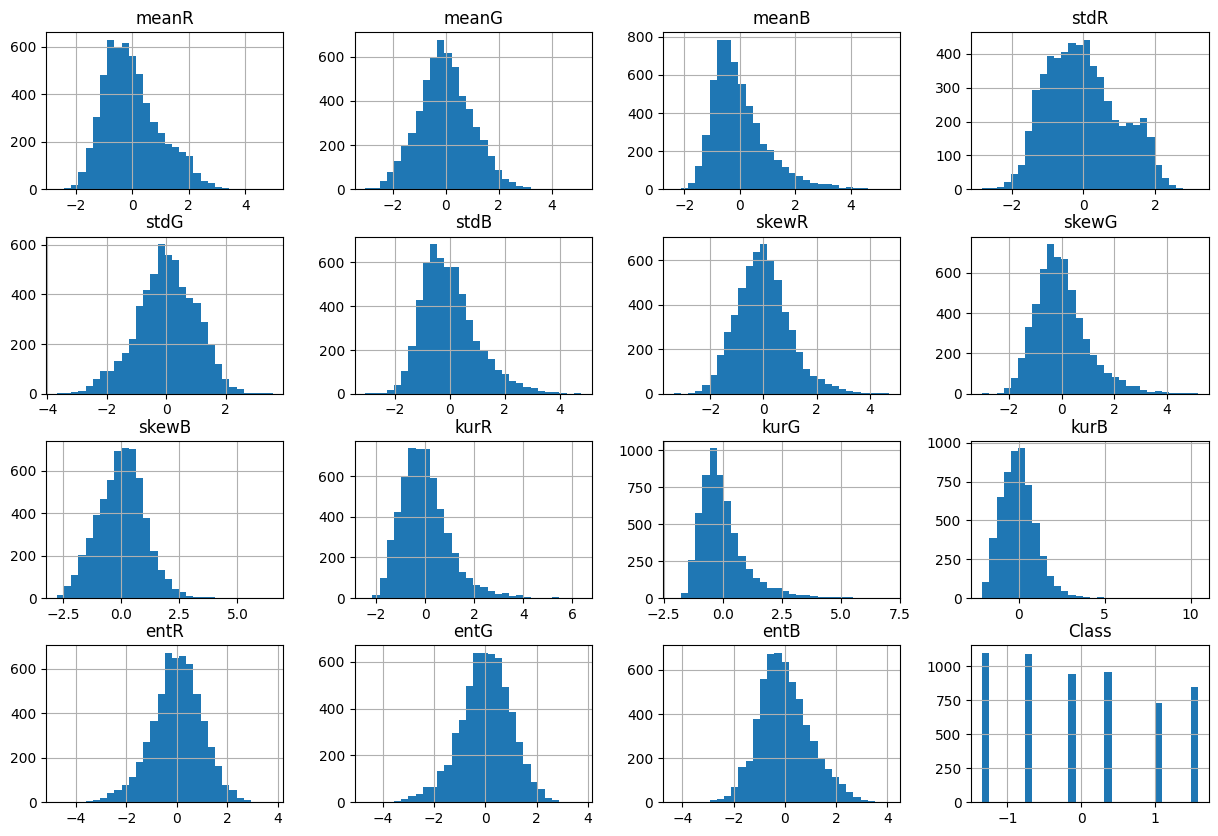

In [17]:
df_scaled.hist(figsize=(15, 10), bins=30)
plt.show()


In [18]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
meanR,5656.0,-1.005011e-16,1.000088,-2.669112,-0.737416,-0.159551,0.577704,4.961751
meanG,5656.0,-4.422048e-16,1.000088,-3.028324,-0.659256,-0.051467,0.639629,5.107925
meanB,5656.0,-2.814031e-16,1.000088,-2.377802,-0.695424,-0.226234,0.468031,5.381122
stdR,5656.0,-1.507516e-16,1.000088,-2.819210,-0.769991,-0.085893,0.661674,3.196043
stdG,5656.0,3.015033e-16,1.000088,-3.683966,-0.623469,0.016183,0.703110,3.574796
stdB,5656.0,-5.427059e-16,1.000088,-3.063416,-0.714110,-0.140935,0.536519,4.765722
skewR,5656.0,2.512527e-16,1.000088,-3.377029,-0.675300,-0.057478,0.578044,4.743765
skewG,5656.0,-1.226113e-15,1.000088,-3.019221,-0.672386,-0.127475,0.507283,5.178659
skewB,5656.0,2.010022e-16,1.000088,-2.782655,-0.682211,0.028780,0.656936,6.515335
kurR,5656.0,-3.819042e-16,1.000088,-2.439000,-0.682996,-0.120632,0.509556,6.346853


In [19]:
#Split Dataset
X = df_scaled.drop(columns=['Class'])
y = df_scaled['Class']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X.head(3)

,meanR,meanG,meanB,stdR,stdG,stdB,skewR,skewG,skewB,kurR,kurG,kurB,entR,entG,entB
0,-0.665102,0.008693,-0.644699,-0.957046,-0.074790,-0.358296,-0.280260,-0.336533,0.694148,-0.275050,-0.357389,0.413462,0.260530,0.270445,-1.030791
1,-0.731039,-0.226412,-0.811958,-0.894219,-0.183617,-0.720664,0.071609,0.002909,0.695626,0.022708,-0.088418,0.532731,-0.107272,-0.118157,-1.012572
2,-0.178144,-0.392545,-0.305512,-0.087327,-0.407671,-0.370002,0.016748,0.039301,0.182180,-0.090864,-0.068511,0.161766,-0.205810,-0.210945,0.042868


In [21]:
y.head(10)

0   -1.344481
1   -1.344481
2   -1.344481
3   -1.344481
4   -1.344481
5   -1.344481
6   -1.344481
7   -1.344481
8   -1.344481
9   -1.344481
Name: Class, dtype: float64

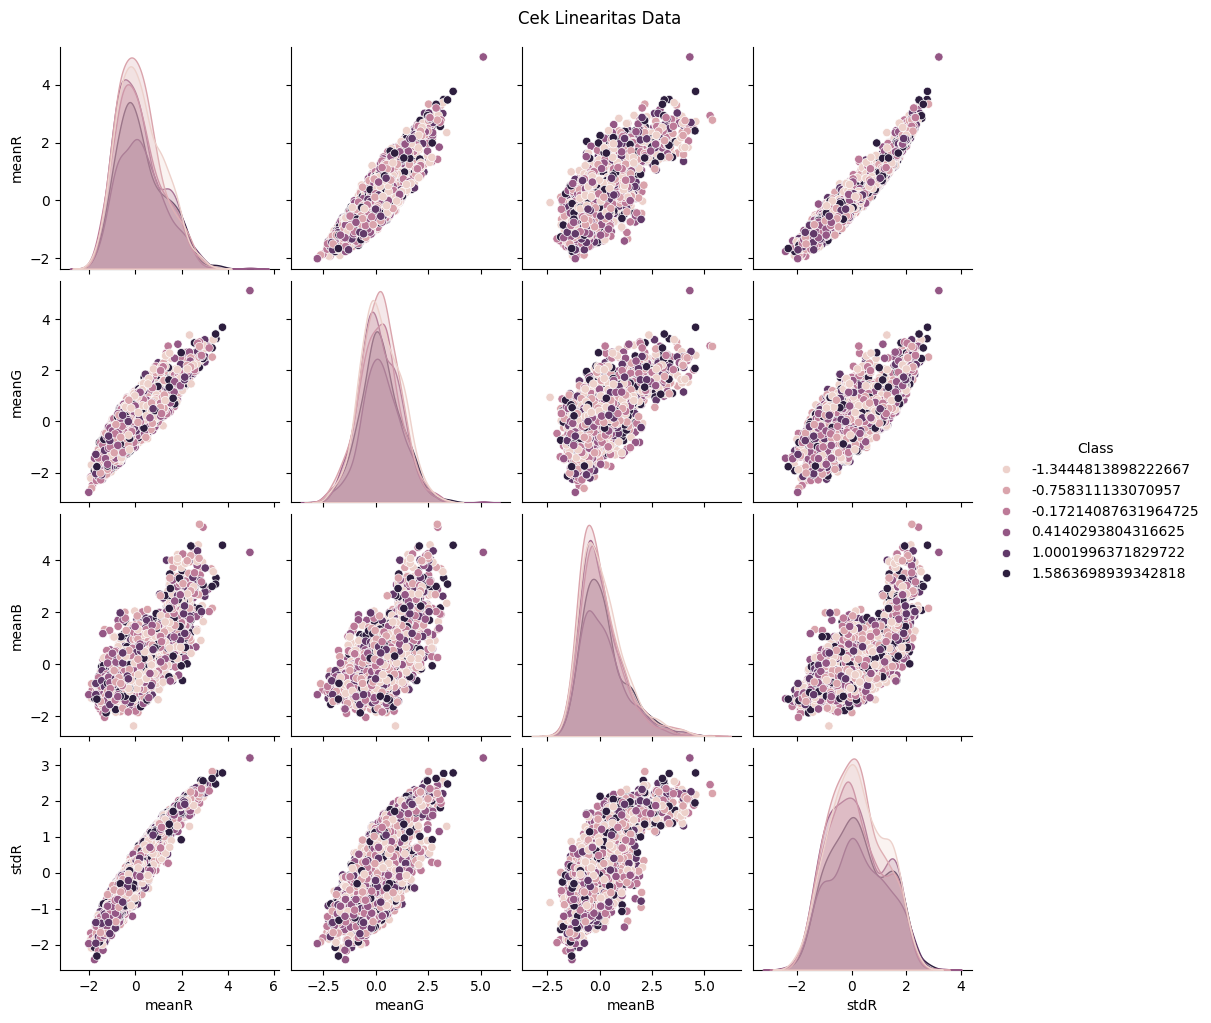

In [22]:
# Pairplot untuk beberapa fitur terpilih (gunakan hanya 4-5 fitur untuk efisiensi)
selected_features = X_train.columns[:4]
# Pilih 5 fitur pertama
sns.pairplot(pd.concat([X_train[selected_features], y_train.reset_index(drop=True)], axis=1), diag_kind='kde', hue=y_train.name)
plt.suptitle("Cek Linearitas Data", y=1.02)
plt.show()


###Dimension Reduction

In [24]:
#Dimension Reduction PCA

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_train)

In [25]:
# Plot sebagai strip plot

def plot_dimension(data):
    plt.scatter(data[:, 0], y_train, c=y_train, cmap='tab10', alpha=0.7)
    plt.colorbar(ticks=range(len(y.unique())), label='Class')
    plt.title("t-SNE Dimensionality Reduction (1D)")
    plt.xlabel("t-SNE 1")
    plt.ylabel("Class")
    plt.show()

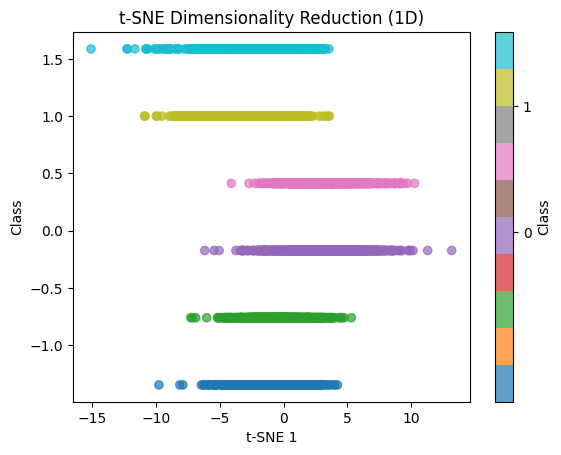

In [26]:
plot_dimension(X_pca)

In [27]:
#Dimension Reduction TSNE
tsne = TSNE(n_components=1, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_train)

d:\Kuliah\JST\Neural-Network-Final-Project\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


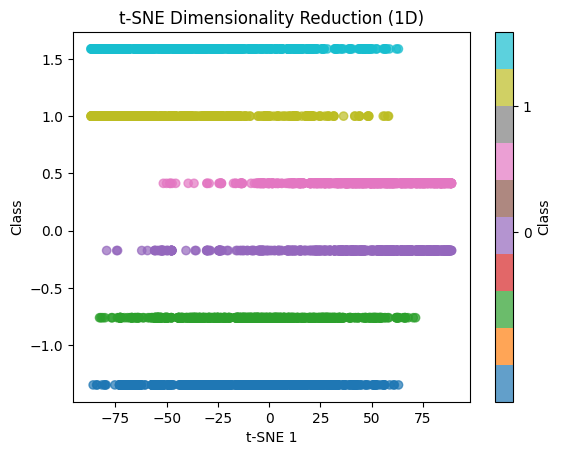

In [28]:
plot_dimension(X_tsne)

###Building Model

In [29]:
class SOMlinier:
    def __init__(self, m, fitur, R, alpha, tau):
        self.m = m 
        self.fitur = fitur 
        self.w = np.random.rand(m, fitur) 
        self.R0 = R 
        self.alpha0 = alpha
        self.tau = tau
    
    def hitung_jarak(self, x):
        D = np.linalg.norm(self.w - x, axis=1)
        return np.argmin(D) 
    
    def update_bobot(self, x, j, R, alpha):
        for i in range(self.m):
            jarak = abs(i - j)  
            if jarak <= R:
                influence = np.exp(-jarak**2 / (2 * (R**2)))
                self.w[i] += alpha * influence * (x - self.w[i])
    
    def kurangi_radius(self, iterasi):
        return self.R0 * np.exp(-iterasi / self.tau)

    def kurangi_learning_rate(self, iterasi):
        return self.alpha0 * np.exp(-iterasi / self.tau)

    def train(self, data, n_iterasi):
        for t in range(n_iterasi):
            x = data[np.random.randint(0, len(data))]
            j = self.hitung_jarak(x)
            R = self.kurangi_radius(t)
            alpha = self.kurangi_learning_rate(t)
            self.update_bobot(x, j, R, alpha)

In [30]:
# Konversi X_train menjadi numpy array
X_train_np = X_train.values  # Ubah X_train dari DataFrame ke numpy array
y_train_np = y_train.values

# Inisialisasi SOM tanpa PCA dan t-SNE
m = 6
fitur = X_train_np.shape[1]  # Sesuaikan fitur berdasarkan dimensi X_train_np
R = 3
alpha0 = 0.5
tau = 1000

som_normal = SOMlinier(m=m, fitur=fitur, R=R, alpha=alpha0, tau=tau)

# Train SOM dengan data tanpa PCA dan t-SNE
n_iterations = 1000
som_normal.train(X_train_np, n_iterations)

# Akses bobot SOM yang telah dilatih
weights_normal = som_normal.w
print("Trained SOM weights:", weights_normal)


Trained SOM weights: [[-1.3066017  -1.20923133 -0.7428343  -1.21087815 -1.09583452 -0.61490836
   1.49452316  1.20653315  0.73439433  1.50768037  1.10119915  0.6747487
  -1.56481628 -1.49531953 -1.16722455]
 [-1.07524886 -0.98340421 -0.59847579 -1.0122412  -0.91257759 -0.51474358
   0.97042031  0.75952742  0.52684979  0.88370797  0.61186991  0.49242238
  -1.18121265 -1.118302   -0.85028084]
 [-0.71738587 -0.61666584 -0.41750955 -0.68237421 -0.55284625 -0.41463304
   0.44128497  0.34531167  0.23509261  0.30677356  0.19693834  0.23473922
  -0.67245318 -0.64419094 -0.40713389]
 [-0.14900776  0.07246147  0.08584331 -0.16291103  0.16737301  0.03385813
  -0.13087994 -0.17097629 -0.33487383 -0.20930131 -0.24884369 -0.31207546
  -0.00699554 -0.00294095  0.27832905]
 [ 0.7804921   0.92513311  0.98906961  0.66490563  0.92432891  0.81655786
  -0.84503202 -0.82438545 -1.00448634 -0.80556822 -0.75941597 -0.88570776
   0.76064386  0.76328789  1.13043598]
 [ 1.33730914  1.36932912  1.48674698  1.1341

In [31]:
# Dengan PCA
m = 6       
fitur = 1
R = 3  
alpha0 = 0.5           
tau = 1000             

# Initialize the SOM
som_pca = SOMlinier(m=m, fitur=fitur, R=R, alpha=alpha0, tau=tau)

# Train the SOM with the PCA-reduced dataset
n_iterations = 1000  # Number of iterations
som_pca.train(X_pca, n_iterations)

# After training, you can access the SOM weights with:
weights_pca = som_pca.w
print("Trained SOM weights:", weights_pca)

Trained SOM weights: [[-4.28830644]
 [-2.47878582]
 [-0.6189615 ]
 [ 0.91554701]
 [ 2.90054992]
 [ 4.27698282]]


In [32]:
# Dengan t-SNE
m = 6 
fitur = 1
R = 3                     
alpha0 = 0.5              
tau = 1000                

# Initialize the SOM
som_tsne = SOMlinier(m=m, fitur=fitur, R=R, alpha=alpha0, tau=tau)

# Train the SOM with the t-SNE-reduced dataset
som_tsne.train(X_tsne, n_iterations)

# After training, you can access the SOM weights with:
weights_tsne = som_tsne.w
print("Trained SOM weights:", weights_tsne)

Trained SOM weights: [[-55.46213756]
 [-40.3580675 ]
 [-17.08334672]
 [ 13.07350222]
 [ 61.88567894]
 [ 70.0618628 ]]


In [33]:
import matplotlib.pyplot as plt

def visualize_all_features_full(data, labels, som):
    # Daftar nama fitur berdasarkan dataset
    features = ['Mean R', 'Mean G', 'Mean B', 
                'Std R', 'Std G', 'Std B', 
                'Skew R', 'Skew G', 'Skew B', 
                'Kurtosis R', 'Kurtosis G', 'Kurtosis B', 
                'Entropy R', 'Entropy G', 'Entropy B']
    
    # Tentukan warna untuk setiap kelas
    colors = ['r', 'g', 'b', 'c', 'm', 'y']  # Sesuaikan warna untuk kelas 1-6

    # Membuat subplot dengan jumlah sesuai dengan jumlah fitur (15)
    fig, axes = plt.subplots(len(features), 1, figsize=(12, 3 * len(features)), sharex=True)
    
    for idx, feature in enumerate(features):
        ax = axes[idx]
        
        # Plot neuron pada fitur yang sedang ditampilkan
        ax.plot(range(som.m), som.w[:, idx], 'bo-', markersize=10, label="Neurons")  # Neuron di sumbu horizontal
        
        # Plot setiap data point berdasarkan Best Matching Unit (BMU) dan fitur saat ini
        for i, x in enumerate(data):
            # Cari BMU untuk setiap data point
            bmu_index = som.hitung_jarak(x)
            # Plot data point dengan warna sesuai kategori
            ax.plot(bmu_index, x[idx], marker='o', color=colors[labels[i] - 1], alpha=0.6, label=f"Class {labels[i]}" if i == 0 else "")
        
        # Atur judul, label sumbu, dan grid untuk subplot
        ax.set_title(f"Linear SOM Clustering, without dimension reduction - {feature}")
        ax.set_ylabel(feature)
        ax.legend(["Neurons"] + [f"Class {i}" for i in range(1, 7)], loc="upper right")
        ax.grid(True)

    plt.xlabel("Neuron Index")
    plt.tight_layout()
    plt.show()

In [34]:
def visualize_reduced_features(data, labels, som):
    # Plot neuron pada satu komponen hasil reduksi dimensi
    plt.figure(figsize=(10, 6))
    
    # Plot posisi neuron di peta SOM untuk satu komponen
    plt.plot(range(som.m), som.w[:, 0], 'bo-', markersize=10, label="Neuron (Component 1)")

    # Warna untuk setiap kelas
    colors = ['r', 'g', 'b', 'c', 'm', 'y']

    # Plot setiap data point dengan satu komponen hasil reduksi
    for i, x in enumerate(data):
        bmu_index = som.hitung_jarak(x)
        # Hanya gunakan x[0] karena data hanya memiliki satu dimensi
        plt.plot(bmu_index, x[0], marker='o', color=colors[labels[i] - 1], alpha=0.6, label=f"Class {labels[i]}" if i == 0 else "")
    
    # Atur detail plot
    plt.title("t-SNE or PCA Clustering Visualization (1D)")
    plt.xlabel("Neuron Index")
    plt.ylabel("Reduced Dimension Component")
    plt.legend(["Neuron (Component 1)"] + [f"Class {i}" for i in range(1, 7)], loc="upper right")
    plt.grid(True)
    plt.show()

In [35]:
# visualize_all_features_full(X_train_np, y_train_np, som_normal) 

In [36]:
# # Memanggil fungsi visualisasi dengan dataset PCA
# visualize_reduced_features(X_pca, df["Class"].values, som_pca)

In [37]:
# # Memanggil fungsi visualisasi dengan dataset t-sne
# visualize_reduced_features(X_tsne, df["Class"].values, som_tsne)

###Evaluasi 1

In [38]:
from sklearn.metrics import silhouette_score

In [39]:

silhouette_avg = silhouette_score(X_train, y_train.values)  # Gunakan y_train untuk mencocokkan data pada X_pca
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.06274745154438173


In [40]:
# Hitung Silhouette Score dengan label yang sesuai
silhouette_avg = silhouette_score(X_pca, y_train.values)  # Gunakan y_train untuk mencocokkan data pada X_pca
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.11635042864512098


In [41]:
silhouette_avg = silhouette_score(X_tsne, y_train.values)  # Gunakan y_train untuk mencocokkan data pada X_pca
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.12507324


In [42]:
from sklearn.metrics import davies_bouldin_score

In [43]:
db_index = davies_bouldin_score(X_train, y_train.values)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 12.058537056774233


In [44]:
db_index = davies_bouldin_score(X_pca, y_train.values)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 15.791881140972047


In [45]:
db_index = davies_bouldin_score(X_tsne, y_train.values)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 17.9205700643124


In [46]:
from somperf.metrics import *
from somperf.utils.topology import rectangular_topology_dist

In [47]:
# map_size = (6, 1)  # 6 neurons in 1 row (linear SOM)

# # Ambil bobot dari SOM hasil PCA yang sudah dilatih
# weights_pca = som_pca.w  # weights_pca seharusnya berbentuk (6, 1)

# # Hitung beberapa metrik menggunakan somperf
# print('Topographic Product =', topographic_product(rectangular_topology_dist(map_size), weights_pca))
# print('Neighborhood Preservation =', neighborhood_preservation(1, weights_pca, X_pca))
# print('Trustworthiness =', trustworthiness(1, weights_pca, X_pca))

In [48]:
# map_size = (6, 1)  # 6 neurons in 1 row (linear SOM)

# # Ambil bobot dari SOM hasil PCA yang sudah dilatih
# weights_tsne = som_tsne.w  # weights_tsne seharusnya berbentuk (6, 1)

# # Hitung beberapa metrik menggunakan somperf
# print('Topographic Product =', topographic_product(rectangular_topology_dist(map_size), weights_tsne))
# print('Neighborhood Preservation =', neighborhood_preservation(1, weights_tsne, X_tsne))
# print('Trustworthiness =', trustworthiness(1, weights_tsne, X_tsne))

###Tuning

In [50]:
import optuna
from minisom import MiniSom
from sklearn.metrics import silhouette_score
import numpy as np

# Pastikan X_train adalah numpy array
X_train_np = X_train.values if isinstance(X_train, pd.DataFrame) else X_train  # Convert to numpy array if it's a DataFrame

# Fungsi objektif untuk mengoptimalkan (negatif dari silhouette score)
def objective(trial):
    m = trial.suggest_int('m', 5, 15)  # Jumlah neuron
    R = trial.suggest_int('R', 1, 5)   # Radius
    alpha0 = trial.suggest_float('alpha0', 0.1, 0.9)  # Learning rate
    tau = trial.suggest_int('tau', 100, 1000)  # Waktu pengurangan
    n_iterations = trial.suggest_int('n_iterations', 100, 1000)
    
    # Inisialisasi SOM dengan parameter yang dipilih
    som = MiniSom(m, m, X_train_np.shape[1], sigma=R, learning_rate=alpha0, random_seed=42)
    som.random_weights_init(X_train_np)
    som.train_random(X_train_np, 1000)
    
    # Hitung label dan silhouette score
    labels = np.array([som.winner(x)[0] for x in X_train_np])
    score = silhouette_score(X_train_np, labels)
    
    return -score  # Kita ingin memaksimalkan silhouette score, jadi mengembalikan nilai negatif

# Optimalkan fungsi objektif
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Parameter terbaik
print("Best parameters for SOM:", study.best_params)
print("Best silhouette score:", -study.best_value)


[I 2024-11-12 14:25:20,588] A new study created in memory with name: no-name-096d536e-df31-4501-b361-87bb8131e277
[I 2024-11-12 14:25:20,876] Trial 0 finished with value: 0.01897847917079137 and parameters: {'m': 7, 'R': 2, 'alpha0': 0.8573064613758586, 'tau': 754, 'n_iterations': 154}. Best is trial 0 with value: 0.01897847917079137.
[I 2024-11-12 14:25:21,182] Trial 1 finished with value: 0.10081700860142118 and parameters: {'m': 13, 'R': 2, 'alpha0': 0.46594665532861357, 'tau': 481, 'n_iterations': 170}. Best is trial 1 with value: 0.10081700860142118.
[I 2024-11-12 14:25:21,509] Trial 2 finished with value: 0.043216723075149795 and parameters: {'m': 11, 'R': 3, 'alpha0': 0.21844370226437687, 'tau': 221, 'n_iterations': 136}. Best is trial 1 with value: 0.10081700860142118.
[I 2024-11-12 14:25:21,842] Trial 3 finished with value: 0.07698372628516961 and parameters: {'m': 15, 'R': 5, 'alpha0': 0.3812600214625633, 'tau': 921, 'n_iterations': 139}. Best is trial 1 with value: 0.1008170

Best parameters for SOM: {'m': 15, 'R': 1, 'alpha0': 0.11571090995138311, 'tau': 984, 'n_iterations': 982}
Best silhouette score: -0.18015581086082028


In [2]:
import optuna
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Fungsi objektif untuk mengoptimalkan PCA
def objective(trial):
    n_components = trial.suggest_int('n_components', 2, 15)  # Jumlah komponen utama
    
    # Standarisasi data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Inisialisasi PCA dengan jumlah komponen yang dipilih
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_train_scaled)
    
    # Menghitung explained variance sebagai metrik evaluasi
    explained_variance = np.sum(pca.explained_variance_ratio_)
    
    return explained_variance  # Mengembalikan total variance yang dijelaskan

# Optimalkan fungsi objektif
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Parameter terbaik
print("Best parameters for PCA:", study.best_params)
print("Best explained variance:", study.best_value)


[I 2024-11-12 14:24:15,575] A new study created in memory with name: no-name-6fcc03ac-02f2-4818-896a-78141a0f9315
[W 2024-11-12 14:24:15,576] Trial 0 failed with parameters: {'n_components': 9} because of the following error: NameError("name 'X_train' is not defined").
Traceback (most recent call last):
  File "d:\Kuliah\JST\Neural-Network-Final-Project\.venv\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\lmaos\AppData\Local\Temp\ipykernel_12836\3434340852.py", line 12, in objective
    X_train_scaled = scaler.fit_transform(X_train)
                                          ^^^^^^^
NameError: name 'X_train' is not defined
[W 2024-11-12 14:24:15,584] Trial 0 failed with value None.


NameError: name 'X_train' is not defined

In [51]:
import optuna
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

# Fungsi objektif untuk mengoptimalkan t-SNE
def objective(trial):
    # Mengatur parameter t-SNE dengan Optuna
    perplexity = trial.suggest_int('perplexity', 5, 50)  # Perplexity
    learning_rate = trial.suggest_float('learning_rate', 10, 1000)  # Learning rate
    n_iter = trial.suggest_int('n_iter', 500, 1500)  # Jumlah iterasi
    n_components = trial.suggest_int('n_components', 2, 3)  # Jumlah dimensi untuk hasil t-SNE (2D atau 3D)
    
    # Inisialisasi t-SNE dengan parameter yang dipilih
    tsne = TSNE(perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, n_components=n_components)
    X_tsne = tsne.fit_transform(X_train)
    
    # Hitung Silhouette Score untuk evaluasi (gunakan label langsung dari t-SNE)
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels = kmeans.fit_predict(X_tsne)
    
    score = silhouette_score(X_tsne, labels)
    
    return score  # Kita ingin memaksimalkan silhouette score

# Optimalkan fungsi objektif
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Parameter terbaik
print("Best parameters for t-SNE:", study.best_params)
print("Best silhouette score for t-SNE:", study.best_value)


[I 2024-11-12 15:12:49,676] A new study created in memory with name: no-name-c598dd90-b490-45c0-99c3-4949da8b7822
d:\Kuliah\JST\Neural-Network-Final-Project\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
[I 2024-11-12 15:12:54,952] Trial 0 finished with value: 0.38709813356399536 and parameters: {'perplexity': 7, 'learning_rate': 105.06264591457159, 'n_iter': 747, 'n_components': 2}. Best is trial 0 with value: 0.38709813356399536.
d:\Kuliah\JST\Neural-Network-Final-Project\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
[I 2024-11-12 15:13:11,131] Trial 1 finished with value: 0.3448368012905121 and parameters: {'perplexity': 45, 'learning_rate': 375.646576109149, 'n_iter': 566, 'n_components': 3}. Best is trial 0 with value: 0.38709813356399536.
d:\K

Best parameters for t-SNE: {'perplexity': 14, 'learning_rate': 174.9349348627195, 'n_iter': 988, 'n_components': 2}
Best silhouette score for t-SNE: 0.39742007851600647
